##### BACKGROUND

Terrorism is a global threat that involves the use of violence and intimidation,
particularly against civilians,to achieve political, religious, or ideological goals.
It disrupts societies, instills fear, and causes significantloss of life and property.
Terrorist acts are often orchestrated by extremist groups or individuals who seek to draw 
attention to their cause or destabilize governments and communities. Combating terrorism 
requires international cooperation,intelligence sharing, and comprehensive strategies that 
address the root causes of radicalization and violence.

##### THE OBJECTIVE

To analyze the data and draw conclusions regarding the distribution and nature of terrorist incidents worldwide.

##### DATA SOURCE

The Data Extract from the Global Terrorism Database (GTD) - an open-source database including information on terrorist attacks 
around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as internationalattacks 
terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database 
is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), 
headquartered at the University of Maryland.

In [1]:
## IMPORTING NECESSARY LIBARARIES

## data Manuplation Libararies:
import pandas as pd
import numpy as np

## data visualization Libararies:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go

In [2]:
## Loading Data

data = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")

C:\Users\hp\AppData\Local\Temp\ipykernel_13672\785613463.py:3: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


In [3]:
## DISPLAY COLUMNS FOR BETTER VIEW
pd.set_option('display.max_columns', None) 

In [4]:
## DISPLAY sample from the  DATA
data.sample(5)

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
26330,26330,198510020001,1985,10,2,NaN,0,NaN,43,Chile,3,South America,O'Higgins,Rancagua,-34.170331,-70.740822,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,NaN,NaN,NaN,3 blocks from El Teniente Stadium where a civi...,43.0,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manuel Rodriguez Patriotic Front (FPMR),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
88265,88265,200808030016,2008,8,3,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Banaadir,Mogadishu,2.006809,45.277001,1.0,0,The incident occurred in southern Mogadishu.,"08/03/2008: On Sunday morning, a roadside bomb...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,NaN,Indiscriminate civilians,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,The specific motive for the attack is unknown.,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown explosives were used in the bombing at...,20.0,0.0,0.0,45.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Deutsche Presse-Agentur, ""Bomb Blast kills 20 ...","Voice of America, ""At Least 20 Killed in Somal...",NaN,ISVG,-9,-9,0,-9,NaN
85232,85232,200712080006,2007,12,8,NaN,0,NaN,6,Algeria,10,Middle East & North Africa,Algiers (Province),Algiers,36.763763,3.055413,1.0,0,NaN,12/08/2007: Terrorists targeted a convoy trans...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,1.0,Gas/Oil/Electric,Russian civilians,Russian workers in Algiers for the Stroytrans ...,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Roadside bomb targets Russian workers in Alge...",NaN,NaN,CETIS,-9,-9,1,1,NaN
75373,75373,200303280006,2003,3,28,NaN,0,NaN,92,India,6,South Asia,Jamm

In [14]:
## SIZE OF DATA
data.size

24709976

In [15]:
## SHAPE OF DATA
data.shape

(181691, 136)

In [9]:
## INFORMATION ABOUT THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, Unnamed: 0 to related
dtypes: float64(55), int64(23), object(58)
memory usage: 188.5+ MB


In [17]:
## Summary of Data Statistics
data.describe()

,Unnamed: 0,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,90845.000000,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,52449.818217,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,0.000000,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,45422.500000,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,90845.000000,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,136267.500000,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,181690.000000,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
## FINDING THE DUPLICATES
data.duplicated().sum()

0

In [20]:
## FINDING THE MISSING DATA
missing_values_counts = data.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
missing_values_counts

gsubname3           181671
weapsubtype4        181621
weapsubtype4_txt    181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
guncertain1            380
ishostkid              178
specificity              6
doubtterr                1
multiple                 1
Length: 106, dtype: int64

Regarding the missing data identified:
- Approximately 70 columns have more than 70% missing data.
- Other columns have varying percentages of missing data.

The approach for handling the missing data will be as follows:
- Drop columns with more than 70% missing values.
- For the remaining columns, impute missing values by assigning the *Mode* or *Frequent* for
  categorical data and the *Mean* or *Median* for numerical data.

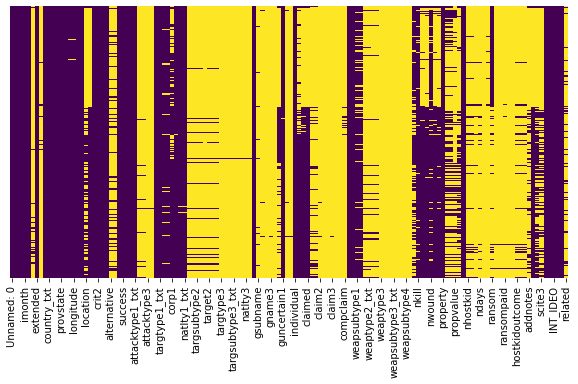

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.show()

###### Approach one: hadnling the missing data by drop the data with more than 50% missing data

In [35]:
## DROP THE COLUMNS WITH MORE THAN 70% MISSING VALUES
null_cols = data.columns[data.isnull().sum() > 90000]
data.drop(columns=null_cols, inplace=True)

In [36]:
## CHECK THE REMAINING MISSING DATA
missing_values_counts = data.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
missing_values_counts

nperps              71115
nperpcap            69489
nwoundte            69143
weapdetail          67670
nkillter            66958
scite1              66191
summary             66129
claimed             66120
nwoundus            64702
nkillus             64446
corp1               42550
weapsubtype1        20768
weapsubtype1_txt    20768
nwound              16311
targsubtype1_txt    10373
targsubtype1        10373
nkill               10313
longitude            4557
latitude             4556
natlty1              1559
natlty1_txt          1559
target1               636
city                  434
provstate             421
guncertain1           380
ishostkid             178
specificity             6
multiple                1
doubtterr               1
dtype: int64

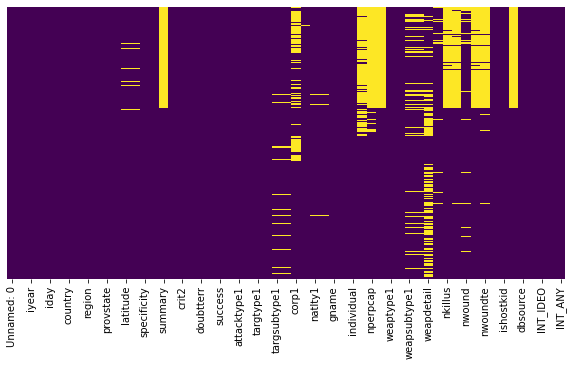

In [37]:
## visualize the data after removing the data with more than 50% missing value
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.show()

###### Approach two : handling the missing values with less than 50% missing values 

In [7]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [39]:
numerical_cols

Index(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'extended',
       'country', 'region', 'latitude', 'longitude', 'specificity', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1',
       'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [40]:
categorical_cols

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'dbsource'],
      dtype='object')

In [8]:
## a function to itirrate over the categorical and numerical columns and impute the missig data with mean and mode 
def fill_missing_values(cat,num):
    for i in cat:
        # Fill categorical columns with the mode (most frequent value)
        data[i].fillna(data[i].mean(), inplace=True)
    for i in num:
        # Fill numerical columns with the mean
        data[i].fillna('Unknown', inplace=True)

fill_missing_values(numerical_cols,categorical_cols)

In [83]:
missing_values_counts = data.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
missing_values_counts

Series([], dtype: int64)

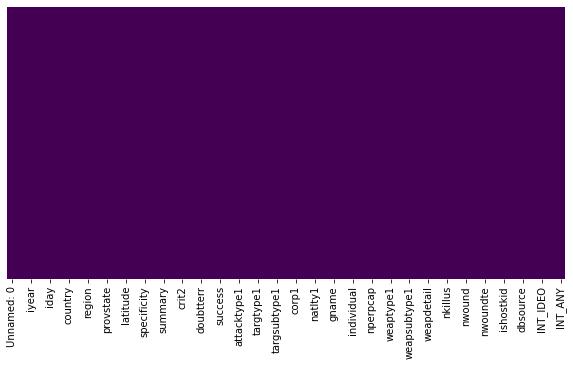

In [84]:
## visualize the data after imputing the missing values with mode and mean
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.show()

The missing values has been handled

##### Note:

Given the large number of features (columns) in the dataset, we will select the most important columns for analysis to derive meaningful insights.

In [9]:
## the new data with the desired importent columns
sub_data = data[['iyear','imonth','iday','country_txt','region_txt','provstate','city',
                 'latitude','longitude','success','attacktype1_txt','targtype1_txt',
                'targsubtype1_txt','target1','natlty1_txt','gname','weaptype1_txt','weapsubtype1_txt'
                ,'suicide','nkill']]

In [10]:
sub_data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,suicide,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,Unknown,0,1.000000
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,Unknown,0,0.000000
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,Unknown,0,1.000000
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,Unknown Explosive Type,0,2.403272
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,Unknown,0,2.403272


In [11]:
sub_data.duplicated().sum()

10872

*Note*: the duplicates appear here cause we drop the "unnamed:0" and "evintid" columns which are a unique identfier

In [9]:
## Delete the duplicates roews
sub_data.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5840\2312984626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.drop_duplicates(inplace=True)


In [11]:
sub_data.duplicated().sum()

0

In [12]:
sub_data.shape

(170819, 20)

In [32]:
print(f' The shape of "iday" with zeros: {sub_data[sub_data["iday"]==0].shape} === The shape of "imonth" with zeros: {sub_data[sub_data["imonth"]==0].shape}')

 The shape of "iday" with zeros: (812, 20) === The shape of "imonth" with zeros: (20, 20)


In [37]:
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170819 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             170819 non-null  int64  
 1   imonth            170819 non-null  int64  
 2   iday              170819 non-null  int64  
 3   country_txt       170819 non-null  object 
 4   region_txt        170819 non-null  object 
 5   provstate         170398 non-null  object 
 6   city              170388 non-null  object 
 7   latitude          166811 non-null  float64
 8   longitude         166810 non-null  float64
 9   success           170819 non-null  int64  
 10  attacktype1_txt   170819 non-null  object 
 11  targtype1_txt     170819 non-null  object 
 12  targsubtype1_txt  161492 non-null  object 
 13  target1           170269 non-null  object 
 14  natlty1_txt       169382 non-null  object 
 15  gname             170819 non-null  object 
 16  weaptype1_txt     17

In [38]:
## both "iday" and "imonth" columns have zeros in there minimum values which is not acceptaple
# deleate zeros from "day" and "month" columns:
sub_data1 = sub_data[sub_data['iday'] != 0]
sub_data = sub_data1[sub_data1['imonth'] != 0]

In [39]:
print(f' The shape of "iday" with zeros: {sub_data[sub_data["iday"]==0].shape} === The shape of "imonth" with zeros: {sub_data[sub_data["imonth"]==0].shape}')

 The shape of "iday" with zeros: (0, 20) === The shape of "imonth" with zeros: (0, 20)


[]

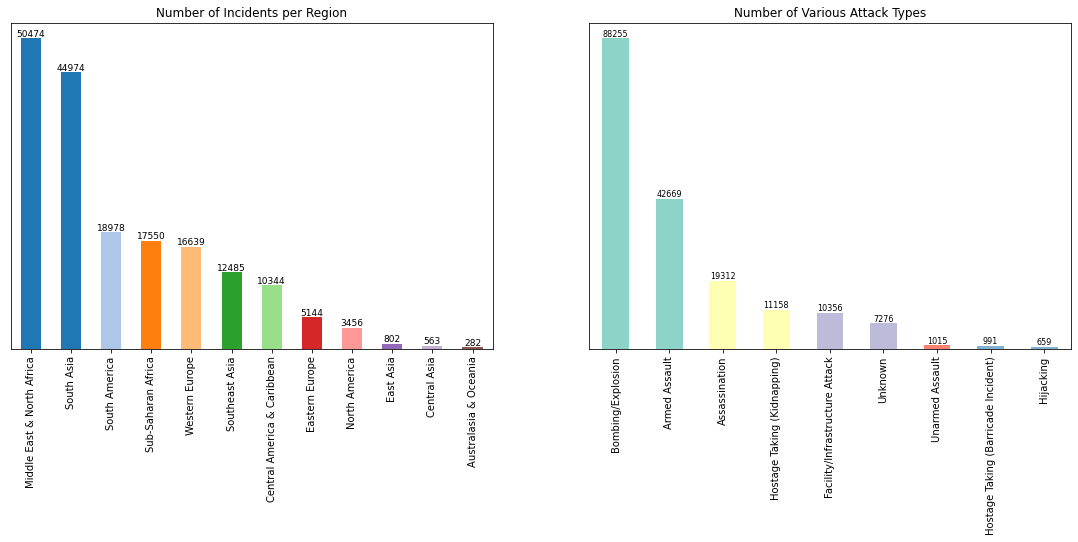

In [18]:
## SUBPLOT (MULTIABLE CHARTS)
plt.figure(figsize=(19, 6)) 
plt.subplot(1, 2, 1) 
colors = plt.cm.tab20(np.linspace(0, 1, data['targtype1_txt'].nunique()))
ax= data['region_txt'].value_counts().plot(kind='bar',rot=90,color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%g', label_type='edge', fontsize=9, color='black')
plt.title('Number of Incidents per Region')
ax.set_yticks([])
plt.subplot(1, 2, 2)
colors = plt.cm.Set3(np.linspace(0, 1, data['targtype1_txt'].nunique()))
ax= data['attacktype1_txt'].value_counts().plot(kind='bar',rot=90,color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%g', label_type='edge', fontsize=8, color='black')
plt.title('Number of Various Attack Types')
ax.set_yticks([])

[]

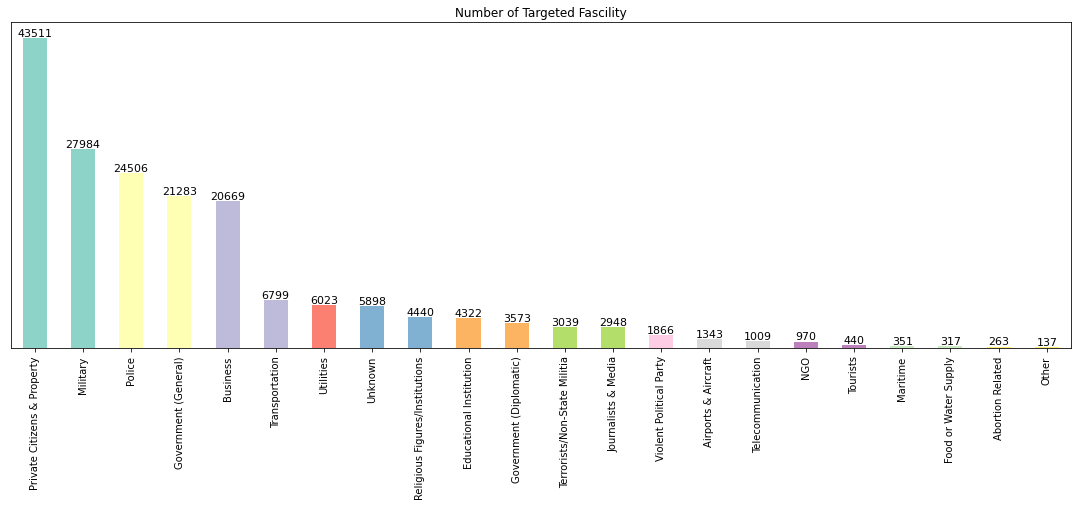

In [22]:
plt.figure(figsize=(19, 6)) 
colors = plt.cm.Set3(np.linspace(0, 1, data['targtype1_txt'].nunique()))
ax= data['targtype1_txt'].value_counts().plot(kind='bar',rot=90,color=colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%g', label_type='edge', fontsize=11, color='black')
plt.title('Number of Targeted Fascility')
ax.set_yticks([])


###### Question to be asked:
How has the number of the terroist activites changed over the year?

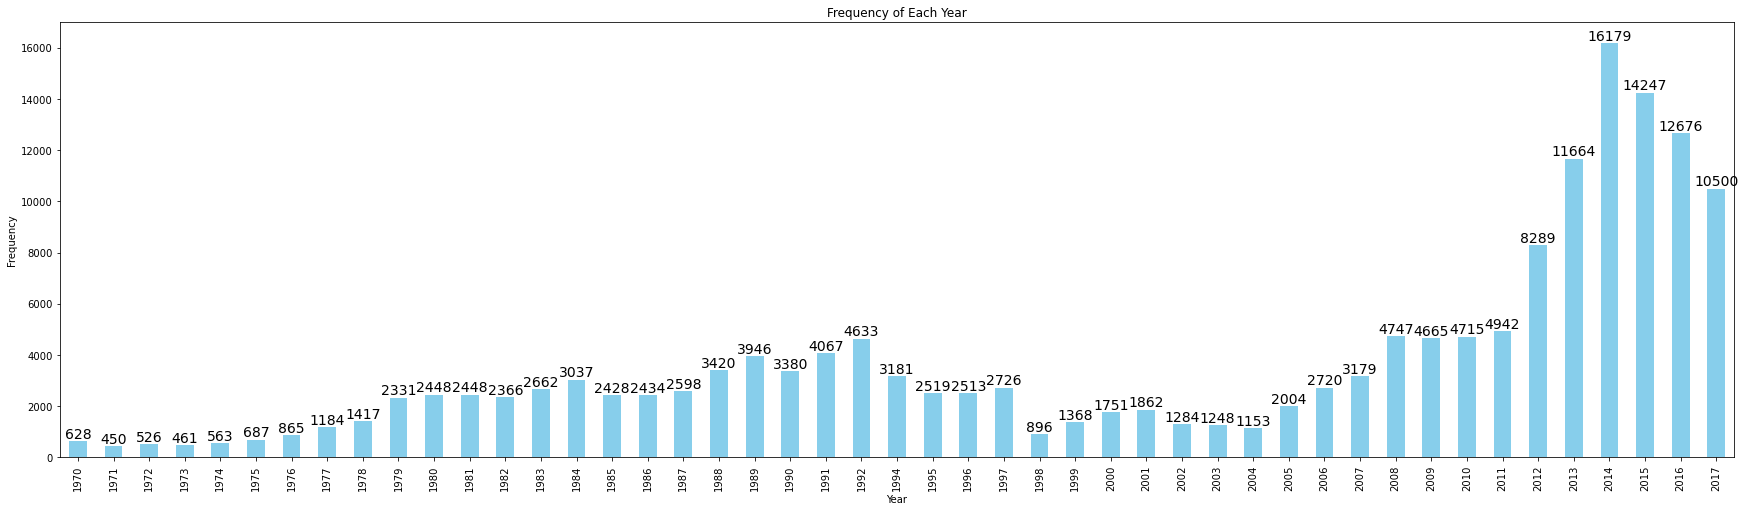

In [40]:
Activites_count = sub_data['iyear'].value_counts().sort_index()
# Plot a bar chart
plt.figure(figsize=(30, 8))
ax = Activites_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Add labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=14, color='black')

plt.show()

the number of the terrorist activities increased and decreased among the year and reach his peek in the 2014 with record that represent the largest number of terrorist attacks with 16179 attacks

###### what are the must region with highst number of terror incedents

In [41]:
sub_data['region_txt'].value_counts()

Middle East & North Africa     47723
South Asia                     43198
Sub-Saharan Africa             16867
South America                  16447
Western Europe                 15002
Southeast Asia                 11986
Central America & Caribbean     8990
Eastern Europe                  4958
North America                   3314
East Asia                        701
Central Asia                     551
Australasia & Oceania            270
Name: region_txt, dtype: int64

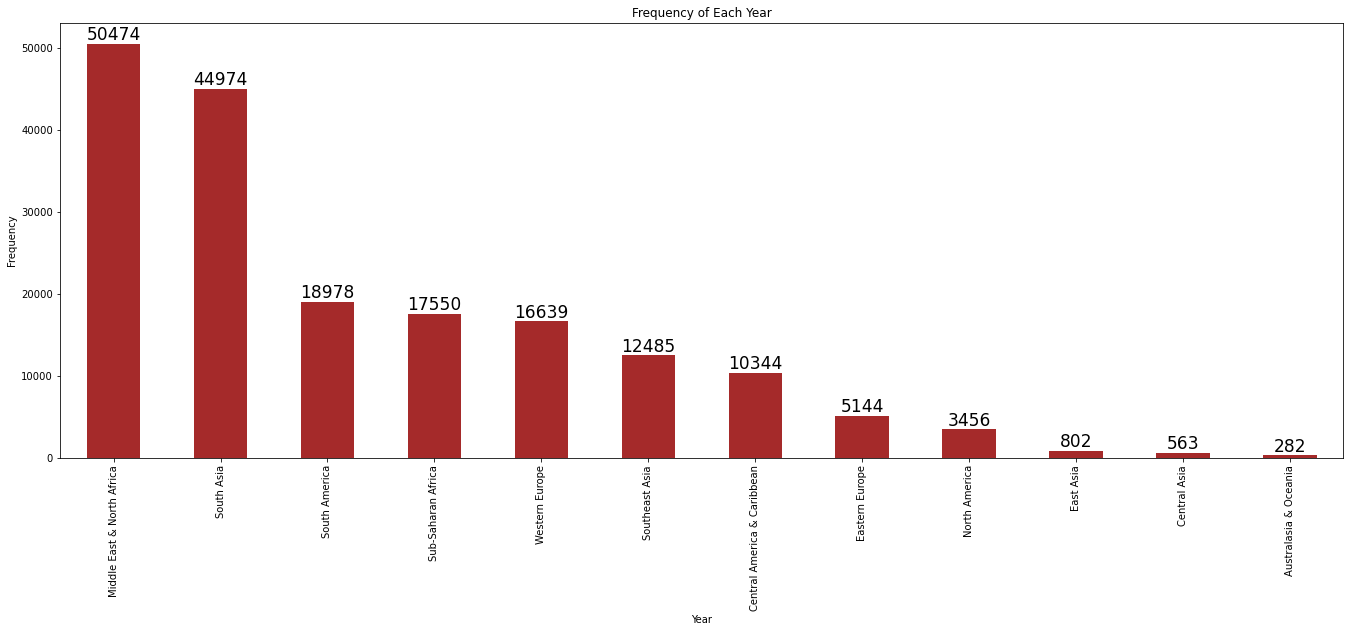

In [23]:
Activites_count = sub_data['region_txt'].value_counts()
plt.figure(figsize=(23, 8))
ax = Activites_count.plot(kind='bar', color='brown',rot=90)
plt.title('Frequency of Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Add labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=17, color='black')

plt.show()

###### what are the common methods of attacks,does it differ in varius in time?

In [56]:
sub_data['weaptype1_txt'] = sub_data['weaptype1_txt'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)','Vehicle')

In [57]:
comm_webon = sub_data['weaptype1_txt'].value_counts()
comm_webon

Explosives            85026
Firearms              57109
Unknown               14205
Incendiary             9405
Melee                  3496
Chemical                310
Vehicle                 135
Sabotage Equipment      133
Other                   108
Fake Weapons             33
Biological               33
Radiological             14
Name: weaptype1_txt, dtype: int64

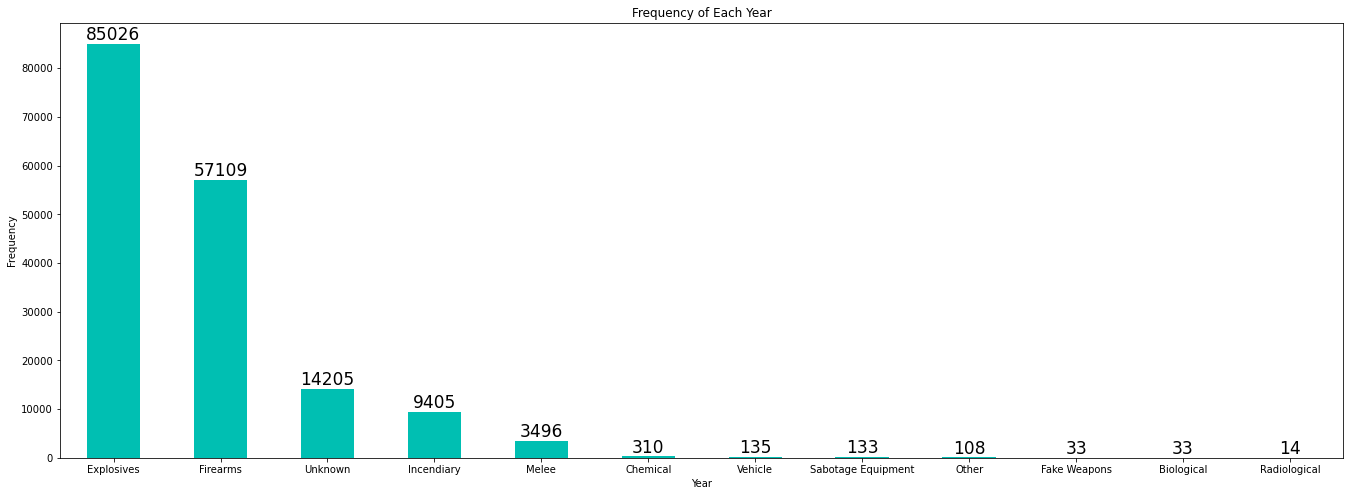

In [61]:
comm_webon = sub_data['weaptype1_txt'].value_counts()
plt.figure(figsize=(23, 8))
ax = comm_webon.plot(kind='bar', color='#00BFB2',rot=0)
plt.title('Frequency of Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Add labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=17, color='black')

plt.show()

###### FINDINGS


- among the 181691 incedent a 161,632 incedent remark as successed, and 20,059 incednet was remark as failed.
- out of 181,691 there is 103,275 incident (No injure)
- out of 181,691 there is 88,149 incident(No death)
- the actual mean for the 78,000 injured incidents  is 6.7 injured person per incidents
- the actual mean for the 93,000 death incidents is 4.42 killed person per incidents
- Death came from 93,000 incidents
- Injured came from 78,000 incidents
- the number of dead victims are 435,052.
- the number injured and wounded are 574,183.
- the most attack type use is Bombing/Explosion.
- the most deadly attack are Armed Assault attacks
- the most target facility is Private Citizens & Property.
- the majority of casualties are from the civilians.
- the most explosive and firearms are equaly the most weapon used in attacks.
- the majority of the explosive are classified as Unknown Explosive Type
- among the regions , Middle East & North Africa is most regions with incedents
- Iraq is most country with most of incedents
- iraq is most country with suscidal incedents
- Baghdad is most city with incedents
- 67,213 dead from suicide attacks
- 2014 is year of the most incedent recorded
